In [20]:
# !pip install -U imbalanced-learn

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import os
import sklearn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

#SMOTE and IMBLearn
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [23]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Muhammad Yaseen\\Desktop': ['.ipynb_checkpoints', 'desktop.ini', 'Final One Ensemble Method Select 23 Features.......ipynb', 'Visual Studio Code.lnk']


In [27]:
data = pd.read_excel('D:Yaseen bhi/projects/Ensemble/Doctor_recomended.xlsx')

In [28]:
#Filling missing data
data.fillna(data.median(), inplace=True)

In [4]:
data

,Sex,SBP,DBP,Pulse,Tx_y,PHA,AirPollution,DS,SPY,F_DBT,F_HF,AA,Tuberculosis,Cough3m,S3m,BR,SGRQc,CAT,WBC,RBC,Pt,Neutrophil,Lymphocytes,Eosinophils,Creatinine,Cholesterol,Total Protein,Alb,AST_V,ALT_V,Total Bilirubin,BUN_V,Height,Wt,FEV1_Measure,FEV1zgfdg,FVC,FVC_Pred_Percent,FEV1FVC_Measure,FEF_Measure,FEF,BDR_FEV1_Measure,FEV1,BDR_FVC_Measure,BDR_FVC_Pred_Percent,BDR_FEF_Measure,BDR_FEF_pcForecast,FF_ratio,BDR2_FEV1_Base,BDR2_FVC_Base,BDR2_FEF_Base,DLCO,DC_DLCO_pcForecast,DC_DLVA_Measure,DC_DLVA_pcForecast,LABA,LAMA,ICS_LABA,Methylxanthine_YN,target_value
0,1.0,120.0,70.0,78.0,16.0,1.0,0.0,20.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,80.1,33.0,6.90,4.595,236.0,58.7,28.8,2.5,0.93,172.0,7.1,4.4,23.0,19.0,0.5,15.0,165.0,62.0,1.59,59.0,3.20,83.0,51.0,0.00,24.0,1.67,62.0,3.28,85.0,0.62,26.0,52.0,5.0,2.0,10.0,12.9,71.0,3.13,82.0,0.0,1.0,0.0,0.0,0
1,2.0,103.0,70.0,78.0,1.0,0.0,0.0,51.0,51.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,35.0,8.87,4.600,312.0,60.8,27.2,1.7,1.04,209.0,7.7,5.2,24.0,40.0,0.6,12.5,160.0,68.0,1.17,50.0,2.82,89.0,41.0,0.58,25.0,1.79,76.0,2.84,90.0,0.66,28.0,63.0,53.0,1.0,14.0,14.2,80.0,4.01,75.0,0.0,0.0,1.0,0.0,0
2,1.0,127.0,75.0,80.0,1.0,0.0,0.0,40.0,40.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,25.0,7.67,4.660,357.0,73.9,16.3,1.8,0.93,172.0,7.1,4.4,23.0,19.0,0.5,15.0,170.0,53.0,2.24,78.0,3.43,81.0,65.0,1.28,60.0,2.49,87.0,3.69,88.0,1.53,71.0,67.0,11.0,8.0,20.0,12.9,71.0,3.13,82.0,0.0,0.0,1.0,0.0,0
3,2.0,127.0,75.0,80.0,4.0,0.0,0.0,40.0,40.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,15.0,5.97,4.120,312.0,61.3,27.3,2.5,0.61,191.0,7.4,4.6,22.0,15.0,0.4,16.0,165.0,62.0,1.59,59.0,3.20,83.0,51.0,0.00,24.0,1.67,62.0,3.28,85.0,0.62,26.0,52.0,5.0,2.0,10.0,12.9,71.0,3.13,82.0,0.0,0.0,1.0,0.0,0
4,1.0,127.0,75.0,80.0,1.0,0.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,10.19,5.000,250.0,65.2,25.9,1.1,0.95,195.0,7.2,4.7,41.0,68.0,0.4,14.3,161.0,79.0,1.96,72.0,3.02,73.0,65.0,0.71,30.0,2.00,73.0,3.10,75.0,0.83,35.0,65.0,2.0,3.0,17.0,12.9,71.0,3.13,82.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.0,110.0,70.0,85.0,8.0,0.0,0.0,23.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,80.1,35.0,9.30,4.300,113.0,92.9,5.3,0.2,0.80,166.0,6.0,4.1,26.0,32.0,0.6,20.0,161.0,54.0,0.45,18.0,1.54,41.0,29.0,0.00,7.0,0.45,18.0,1.40,37.0,0.15,7.0,32.0,0.0,-9.0,5.0,5.0,31.0,2.95,82.0,0.0,0.0,1.0,0.0,1
2896,1.0,136.0,71.0,82.0,3.0,0.0,0.0,27.0,41.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,80.1,10.0,6.90,4.595,236.0,58.7,28.8,2.5,0.93,172.0,7.1,4.4,23.0,19.0,0.5,15.0,168.0,85.0,2.39,64.0,3.14,65.0,76.0,1.96,55.0,2.83,75.0,3.44,72.0,2.92,82.0,82.0,18.0,10.0,49.0,12.9,71.0,3.13,82.0,0.0,1.0,1.0,1.0,1
2897,1.0,104.0,56.0,66.0,3.0,0.0,1.0,40.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,80.1,6.0,11.70,3.300,185.0,85.2,10.7,0.1,1.10,151.0,5.3,3.5,16.0,24.0,0.4,27.0,165.0,81.0,1.69,66.0,3.30,78.0,51.0,0.00,26.0,1.60,63.0,3.22,76.0,0.43,22.0,50.0,-5.0,-2.0,-17.0,11.2,64.0,2.75,80.0,0.0,1.0,0.0,0.0,1
2898,1.0,128.0,74.0,78.0,0.0,0.0,1.0,42.0,42.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,80.1,26.0,13.30,5.100,245.0,66.2,26.7,0.2,1.20,164.0,7.0,4.3,20.0,34.0,1.2,35.0,155.0,60.0,0.92,38.0,2.98,83.0,31.0,0.00,12.0,1.12,46.0,3.21,90.0,0.36,16.0,35.0,21.0,8.0,32.0,6.0,38.0,1.84,47.0,0.0,1.0,1.0,0.0,1


In [29]:
X = data.drop(['target_value'], axis=1)
labels= data['target_value']

In [30]:
print("Counts of label '0': {}".format(sum(labels==0)))
print("Counts of label '1': {} \n".format(sum(labels==1)))

Counts of label '0': 2327
Counts of label '1': 573 



In [31]:
from sklearn.feature_selection import RFECV
X = data.drop('target_value', axis=1)
target = data['target_value']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [32]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 42


In [34]:
# rfecv.grid_scores_

In [35]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  4  5  6  9 10 11 12 13 14 24 30 39 55 56 57 58]


In [36]:
rfecv.estimator_.feature_importances_

array([0.02190687, 0.0233607 , 0.0219257 , 0.02402546, 0.02571132,
       0.01973715, 0.05841974, 0.02534182, 0.02756488, 0.02018621,
       0.02429511, 0.02674987, 0.02440117, 0.02843015, 0.02389242,
       0.02904487, 0.02774292, 0.01899353, 0.02107673, 0.01770918,
       0.0192585 , 0.02138022, 0.0299493 , 0.02284945, 0.01990775,
       0.020867  , 0.01862372, 0.01804439, 0.03140748, 0.02369322,
       0.02230023, 0.01817242, 0.02370677, 0.01812556, 0.02174986,
       0.02326711, 0.02186661, 0.02543133, 0.02319276, 0.01918165,
       0.02232472, 0.02418416])

In [37]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
dset

,attr,importance
6,SGRQc,0.058420
28,BDR_FEV1_Measure,0.031407
22,FEV1_Measure,0.029949
15,Total Protein,0.029045
13,Eosinophils,0.028430
16,Alb,0.027743
8,WBC,0.027565
11,Neutrophil,0.026750
4,SPY,0.025711
37,BDR2_FEF_Base,0.025431


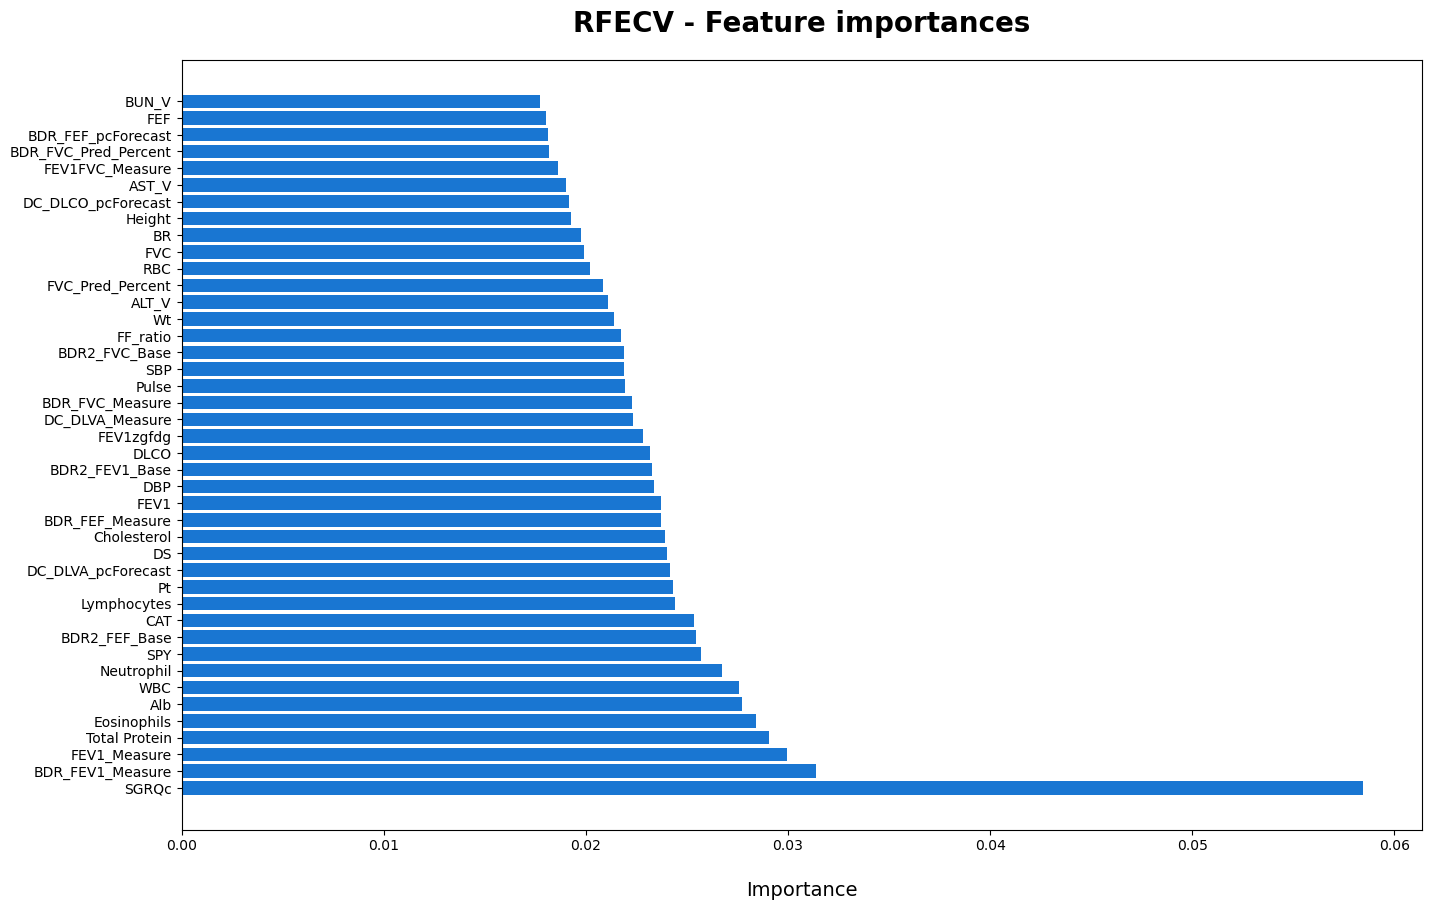

In [38]:
plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

42

In [39]:
final_selected_features=data[['SGRQc','BDR_FEV1_Measure' ,'FEV1_Measure','Total Protein','Eosinophils','Alb','WBC','Neutrophil',
                            'SPY', 'BDR2_FEF_Base', 'CAT', 'Lymphocytes', 'Pt', 'DC_DLVA_pcForecast', 'DS', 'Cholesterol','BDR_FEF_Measure', 
                              'FEV1', 'DBP', 'BDR2_FEV1_Base', 'DLCO',  'FEV1zgfdg', 'DC_DLVA_Measure',
                             'BDR_FVC_Measure', 'Pulse', 'SBP', 'BDR2_FVC_Base', 'FF_ratio', 'Wt', 'ALT_V', 'FVC_Pred_Percent',
                            'RBC', 'FVC', 'BR', 'DC_DLCO_pcForecast', 'AST_V', 'FEV1FVC_Measure', 'BDR_FVC_Pred_Percent',
                             'BDR_FEF_pcForecast', 'FEF', 'BUN_V','target_value']]

30

In [40]:
# final_selected_features=data[['SGRQc','BDR_FEV1_Measure' ,'FEV1_Measure','Total Protein','Eosinophils','Alb','WBC','Neutrophil',
#                             'SPY','CAT', 'Lymphocytes', 'Pt', 'DS', 'Cholesterol','BDR_FEF_Measure',
#                               'FEV1', 'DBP', 'BDR2_FEV1_Base', 'DLCO', 'DC_DLVA_Measure','RBC','FVC',
#                               'Pulse', 'SBP', 'BDR2_FVC_Base','BDR_FEF_pcForecast','FEF', 'FF_ratio', 'Wt', 'ALT_V','target_value']]

In [41]:
final_selected_features.shape

(2900, 42)

In [42]:
# final_selected = data[['Sex','DBP','LABA_YN','ex_asthma','Sputum3m','AsthmaPast',
#                                        'LAMA_YN','SGRQc_RespSympt','ICS_LABA_YN','DC_DLCO_Measure','FEF_Pred_Percent',
#                                        'WBC_V','SmokePYs','BreathResult','Albumin',
#                                        'Platelets','RBC_V','SmokeTime','CAT_cat_total','BDR_FF_pcMeasure',
#                                        'SBP','BDR_FEV1_Pred_Percent','Weight','FVC_Measure','Pulse','BR','Lymphocytes','Pt',
#                               'Cholesterol','DS']]

In [43]:

# final_selected_features

# 24

In [44]:
# final_selected = data[['Sex','DBP','LABA_YN','ex_asthma','Sputum3m','AsthmaPast',
#                                        'LAMA_YN','SGRQc_RespSympt','ICS_LABA_YN','DC_DLCO_Measure','FEF_Pred_Percent',
#                                        'WBC_V','SmokePYs','BreathResult','Albumin',
#                                        'Platelets','RBC_V','SmokeTime','CAT_cat_total','BDR_FF_pcMeasure',
#                                        'SBP','BDR_FEV1_Pred_Percent','Weight','FVC_Measure','Total Protein','Eosinophils',
#                                'Neutrophil','Lymphocytes','DS','Cholesterol']]

In [45]:
X = final_selected_features.drop(['target_value'], axis=1)
target= final_selected_features['target_value']

# SMOTE

In [46]:
sm = SMOTE(random_state=2)
features_res, labels_res = sm.fit_resample(X, target.ravel())

In [47]:
print('After OverSampling, the shape of train_X: {}'.format(features_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(labels_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(labels_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(labels_res==0)))

After OverSampling, the shape of train_X: (4654, 41)
After OverSampling, the shape of train_y: (4654,) 

After OverSampling, counts of label '1': 2327
After OverSampling, counts of label '0': 2327


In [48]:
features_res

,SGRQc,BDR_FEV1_Measure,FEV1_Measure,Total Protein,Eosinophils,Alb,WBC,Neutrophil,SPY,BDR2_FEF_Base,CAT,Lymphocytes,Pt,DC_DLVA_pcForecast,DS,Cholesterol,BDR_FEF_Measure,FEV1,DBP,BDR2_FEV1_Base,DLCO,FEV1zgfdg,DC_DLVA_Measure,BDR_FVC_Measure,Pulse,SBP,BDR2_FVC_Base,FF_ratio,Wt,ALT_V,FVC_Pred_Percent,RBC,FVC,BR,DC_DLCO_pcForecast,AST_V,FEV1FVC_Measure,BDR_FVC_Pred_Percent,BDR_FEF_pcForecast,FEF,BUN_V
0,80.100000,1.670000,1.590000,7.100000,2.500000,4.400000,6.900000,58.700000,4.000000,10.000000,33.000000,28.800000,236.000000,82.000000,20.000000,172.000000,0.620000,62.000000,70.000000,5.000000,12.900000,59.000000,3.130000,3.280000,78.000000,120.000000,2.000000,52.000000,62.000000,19.000000,83.000000,4.595000,3.200000,4.000000,71.000000,23.000000,51.000000,85.000000,26.000000,24.000000,15.000000
1,0.000000,1.790000,1.170000,7.700000,1.700000,5.200000,8.870000,60.800000,51.000000,14.000000,35.000000,27.200000,312.000000,75.000000,51.000000,209.000000,0.660000,76.000000,70.000000,53.000000,14.200000,50.000000,4.010000,2.840000,78.000000,103.000000,1.000000,63.000000,68.000000,40.000000,89.000000,4.600000,2.820000,3.000000,80.000000,24.000000,41.000000,90.000000,28.000000,25.000000,12.500000
2,0.000000,2.490000,2.240000,7.100000,1.800000,4.400000,7.670000,73.900000,40.000000,20.000000,25.000000,16.300000,357.000000,82.000000,40.000000,172.000000,1.530000,87.000000,75.000000,11.000000,12.900000,78.000000,3.130000,3.690000,80.000000,127.000000,8.000000,67.000000,53.000000,19.000000,81.000000,4.660000,3.430000,2.000000,71.000000,23.000000,65.000000,88.000000,71.000000,60.000000,15.000000
3,0.000000,1.670000,1.590000,7.400000,2.500000,4.600000,5.970000,61.300000,40.000000,10.000000,15.000000,27.300000,312.000000,82.000000,40.000000,191.000000,0.620000,62.000000,75.000000,5.000000,12.900000,59.000000,3.130000,3.280000,80.000000,127.000000,2.000000,52.000000,62.000000,15.000000,83.000000,4.120000,3.200000,2.000000,71.000000,22.000000,51.000000,85.000000,26.000000,24.000000,16.000000
4,0.000000,2.000000,1.960000,7.200000,1.100000,4.700000,10.190000,65.200000,45.000000,17.000000,10.000000,25.900000,250.000000,82.000000,45.000000,195.000000,0.830000,73.000000,75.000000,2.000000,12.900000,72.000000,3.130000,3.100000,80.000000,127.000000,3.000000,65.000000,79.000000,68.000000,73.000000,5.000000,3.020000,1.000000,71.000000,41.000000,65.000000,75.000000,35.000000,30.000000,14.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,74.071686,0.550358,0.817957,6.403584,0.230107,3.460215,13.424194,85.844803,47.831542,11.951612,23.663083,8.909498,356.023296,84.168458,47.831542,145.446238,0.548441,30.301075,78.698925,-36.724017,11.989248,56.711471,3.119158,0.904319,94.048388,121.084229,-40.940863,37.301075,40.301075,22.265233,85.759858,4.334946,1.660484,2.566308,74.469533,24.915771,49.397850,36.204300,23.831542,28.663083,23.783154
4650,62.560056,1.466064,1.294992,7.000000,1.494027,4.310720,8.996480,55.074879,37.416533,19.536001,18.845334,35.383467,316.964802,69.820797,37.416533,235.428801,0.507856,54.523733,71.511465,13.952534,10.722506,48.416533,2.738789,3.667365,84.142398,122.142398,10.000000,40.261867,57.416533,21.214400,90.952534,4.310720,3.330581,1.630933,59.558931,17.690667,38.523733,99.952534,21.892800,18.523733,14.154666
4651,52.300000,1.792237,1.579251,7.100000,2.500000,4.400000,6.900000,58.700000,55.298588,4.358306,4.358306,28.800000,236.000000,90.462541,55.298588,172.000000,0.497763,64.820847,85.641694,12.522259,13.464169,56.820847,3.355668,4.492964,106.805647,147.865365,5.761129,39.776329,58.418024,19.000000,99.865365,4.595000,4.236395,1.059718,66.298588,23.000000,37.836047,105.686212,24.119435,23.059718,15.000000
4652,57.801460,2.465200,2.401768,7.060421,1.717684,4.680211,7.854941,46.230510,46.416846,21.218952,20.385260,43.406963,218.187365,82.000000,46.416846,219.583154,1.311453,74.000000,68.021058,2.978942,12.900000,

In [49]:
# from sklearn.ensemble import RandomForestClassifier
# model =RandomForestClassifier(max_depth=1) 
# from boruta import BorutaPy
# feat_selector = BorutaPy(model, n_estimators='auto', verbose=1, random_state=101)
# feat_selector.fit(X,y)
# print(feat_selector.support_) 
# print(feat_selector.ranking_) 
# X_filtered1 = feat_selector.transform(X)

In [50]:
# final_selected

In [51]:
# from sklearn.preprocessing import MinMaxScaler

# #Final_selected =  (Final_selected - Final_selected.mean()) / Final_selected.std()
# scaler = MinMaxScaler(feature_range=(0, 1))
# Final_selected = scaler.fit_transform(features_res)

In [52]:
#labels = data['EX1+EX2']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_res, labels_res, test_size=0.2, random_state=9, stratify = labels_res)

In [53]:
X_train

,SGRQc,BDR_FEV1_Measure,FEV1_Measure,Total Protein,Eosinophils,Alb,WBC,Neutrophil,SPY,BDR2_FEF_Base,CAT,Lymphocytes,Pt,DC_DLVA_pcForecast,DS,Cholesterol,BDR_FEF_Measure,FEV1,DBP,BDR2_FEV1_Base,DLCO,FEV1zgfdg,DC_DLVA_Measure,BDR_FVC_Measure,Pulse,SBP,BDR2_FVC_Base,FF_ratio,Wt,ALT_V,FVC_Pred_Percent,RBC,FVC,BR,DC_DLCO_pcForecast,AST_V,FEV1FVC_Measure,BDR_FVC_Pred_Percent,BDR_FEF_pcForecast,FEF,BUN_V
2696,52.300000,1.290000,0.950000,7.100000,2.500000,4.400000,6.900000,58.700000,10.000000,6.000000,13.000000,28.800000,236.000000,118.000000,20.000000,172.000000,0.280000,55.000000,82.000000,36.000000,8.000000,41.000000,3.890000,3.580000,78.000000,136.000000,22.000000,36.000000,63.000000,19.000000,74.000000,4.595000,2.940000,1.000000,49.000000,23.000000,32.000000,91.000000,16.000000,15.000000,15.000000
555,52.300000,1.800000,1.590000,7.400000,1.500000,4.100000,4.700000,58.600000,78.000000,76.000000,13.000000,32.900000,188.000000,37.000000,39.000000,201.000000,0.860000,61.000000,75.000000,13.000000,5.900000,54.000000,1.450000,3.560000,80.000000,127.000000,6.000000,51.000000,59.400000,29.000000,83.000000,4.800000,3.360000,2.000000,30.000000,25.000000,47.000000,88.000000,34.000000,19.000000,15.000000
1312,0.000000,2.160000,2.070000,7.200000,2.100000,4.800000,6.600000,50.800000,3.000000,6.000000,22.000000,38.500000,275.000000,139.000000,5.000000,41.000000,1.020000,76.000000,75.000000,5.000000,23.200000,73.000000,5.150000,3.380000,92.000000,140.000000,1.000000,64.000000,82.000000,16.000000,83.000000,5.000000,3.350000,1.000000,108.000000,22.000000,62.000000,83.000000,37.000000,35.000000,22.000000
2828,52.300000,0.610000,0.570000,6.300000,2.000000,3.100000,8.300000,70.000000,43.000000,10.000000,29.000000,18.000000,91.000000,56.000000,43.000000,119.000000,0.240000,23.000000,75.000000,7.000000,6.600000,21.000000,2.040000,2.360000,80.000000,127.000000,2.000000,26.000000,44.100000,11.000000,63.000000,4.100000,2.330000,3.000000,53.000000,14.000000,25.000000,64.000000,11.000000,10.000000,11.000000
1211,0.000000,2.630000,2.720000,7.600000,1.400000,4.900000,4.400000,62.700000,20.000000,4.000000,4.000000,24.000000,197.000000,135.000000,20.000000,209.000000,1.150000,83.000000,92.000000,-3.000000,20.900000,86.000000,4.730000,4.230000,74.000000,130.000000,-5.000000,62.000000,78.000000,28.000000,95.000000,4.500000,4.440000,1.000000,97.000000,32.000000,61.000000,91.000000,47.000000,45.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,80.100000,1.268748,1.122332,7.135845,6.364155,4.562433,7.897721,49.720595,84.782200,20.235018,15.984571,31.746646,357.797629,34.406529,39.718694,186.423747,0.354065,35.843918,89.140653,14.751341,7.871869,31.156082,1.455163,4.286825,88.593471,133.125224,14.828488,30.250447,61.500894,27.874776,83.217800,4.507015,3.761199,1.000000,34.125224,30.015429,29.843918,95.499106,11.562612,9.281306,10.125224
900,52.300000,1.030000,1.000000,7.300000,0.100000,4.100000,13.600000,90.800000,15.000000,31.000000,11.000000,5.200000,288.000000,82.000000,30.000000,219.000000,0.360000,47.000000,80.000000,4.000000,12.900000,45.000000,3.130000,2.400000,80.000000,160.000000,-4.000000,43.000000,62.000000,21.000000,71.000000,4.500000,2.500000,2.000000,71.000000,15.000000,40.000000,68.000000,19.000000,14.000000,27.000000
2906,0.000000,3.190842,2.858983,7.100000,2.500000,4.400000,6.900000,58.700000,38.751457,26.467718,8.093932,28.800000,236.000000,107.185921,37.780825,172.000000,1.540255,86.217232,81.125243,11.780825,25.492961,77.405096,4.176184,5.004267,78.874757,128.718204,4.906068,63.624271,80.311164,19.000000,96.561650,4.595000,4.778964,0.031311,109.747571,23.000000,59.718204,101.467718,49.248543,38.530339,15.000000
2423,52.300000,1.710000,1.660000,6.600000,3.000000,4.300000,6.400000,48.500000,34.000000,22.000000,7.000000,39.900000,207.000000,83.000000,49.000000,189.000000,0.650000,58.000000,85.000000,3.000000,13.3

In [54]:
print("Number of transactions X_train dataset: ", X_train.shape)
print("Number of transactions y_train dataset: ", y_train.shape)
print("Number of transactions X_test dataset: ", X_test.shape)
print("Number of transactions y_test dataset: ", y_test.shape)

Number of transactions X_train dataset:  (3723, 41)
Number of transactions y_train dataset:  (3723,)
Number of transactions X_test dataset:  (931, 41)
Number of transactions y_test dataset:  (931,)


# RF

In [57]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X_train, y_train)
prediction = model1.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       466
           1       0.90      0.88      0.89       465

    accuracy                           0.89       931
   macro avg       0.89      0.89      0.89       931
weighted avg       0.89      0.89      0.89       931

0.8893662728249194
[[418  48]
 [ 55 410]]


# SVM

In [59]:
from sklearn.svm import SVC
from sklearn import svm
model2 = svm.LinearSVC(multi_class="ovr")
# model2 = svm.SVC(kernel='rbf', gamma=2.9, C=10, decision_function_shape='ovo')
model2.fit(X_train, y_train)
prediction = model2.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       466
           1       0.50      1.00      0.67       465

    accuracy                           0.51       931
   macro avg       0.75      0.51      0.36       931
weighted avg       0.75      0.51      0.36       931

0.5102040816326531
[[ 10 456]
 [  0 465]]


# DT

In [61]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(min_samples_split=5)
model3.fit(X_train, y_train)
prediction = model3.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       466
           1       0.80      0.83      0.81       465

    accuracy                           0.81       931
   macro avg       0.81      0.81      0.81       931
weighted avg       0.81      0.81      0.81       931

0.8120300751879699
[[371  95]
 [ 80 385]]


# GBM

In [63]:
model4 = GradientBoostingClassifier(random_state=101)
model4.fit(X_train, y_train)
prediction = model4.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       466
           1       0.87      0.85      0.86       465

    accuracy                           0.86       931
   macro avg       0.86      0.86      0.86       931
weighted avg       0.86      0.86      0.86       931

0.8571428571428571
[[405  61]
 [ 72 393]]


# KN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', algorithm = 'auto', leaf_size = 40, p = 2, metric = 'manhattan')
model5.fit(X_train, y_train)
prediction = model5.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       466
           1       0.83      0.95      0.89       465

    accuracy                           0.88       931
   macro avg       0.89      0.88      0.88       931
weighted avg       0.89      0.88      0.88       931

0.8775510204081632
[[375  91]
 [ 23 442]]


# XGB

In [70]:
# !pip install xgboost

In [71]:
from xgboost import XGBClassifier
model6 = XGBClassifier(n_estimators=300)
model6.fit(X_train, y_train)
prediction = model6.predict(X_test)

In [72]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       466
           1       0.89      0.86      0.88       465

    accuracy                           0.88       931
   macro avg       0.88      0.88      0.88       931
weighted avg       0.88      0.88      0.88       931

0.878625134264232
[[419  47]
 [ 66 399]]


# MLP

In [73]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=1500,activation='relu', learning_rate_init=0.000001,shuffle=True,
                    learning_rate='constant', beta_1=0.9, beta_2=0.999 , momentum=0.999,
                    power_t=0.9, solver='lbfgs', alpha=1e-5, random_state=101)

In [74]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(40,40), max_iter=500,activation='relu', learning_rate_init=0.01,shuffle=False,
                    learning_rate='constant', beta_1=0.9, beta_2=0.999 , momentum=0.999,
                    power_t=0.9, solver='lbfgs', alpha=1e-5, random_state=9)

In [75]:
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       466
           1       0.71      0.81      0.76       465

    accuracy                           0.74       931
   macro avg       0.74      0.74      0.74       931
weighted avg       0.74      0.74      0.74       931

0.7389903329752954
[[312 154]
 [ 89 376]]


# Ensemble

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Original

In [78]:
# # Below, random_state is only used to guarantee repeatable result for the tutorial. 
# rfClf = RandomForestClassifier(n_estimators=100, random_state=0) # 500 trees. 
# # svmClf = SVC(kernel='rbf', gamma=7.9, C=20, decision_function_shape='ovo',probability=True, random_state=0) # force a probability calculation
# gbcClf = GradientBoostingClassifier()
# xgbClf = XGBClassifier()
# knClf = KNeighborsClassifier(n_neighbors=2)
# adaClf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf = VotingClassifier(estimators = [('rf',model1), ('gbc', model4), ('ada',model5), ('xgb', model6)], voting='soft') # construct the ensemble classifier

In [79]:
clf.fit(X_train, y_train) 

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gbc',
                              GradientBoostingClassifier(random_state=101)),
                             ('ada',
                              KNeighborsClassifier(leaf_size=40,
                                                   metric='manhattan',
                                                   n_neighbors=2)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_...
                                            gpu_id=-1, grow_policy='depthwise',
                                            importa

In [80]:
prediction = clf.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       466
           1       0.88      0.93      0.90       465

    accuracy                           0.90       931
   macro avg       0.90      0.90      0.90       931
weighted avg       0.90      0.90      0.90       931

0.9022556390977443
[[407  59]
 [ 32 433]]


In [82]:
# !pip install lime

In [83]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)
exp = interpretor.explain_instance(
    data_row=X_test.iloc[22], ##new data
    predict_fn=clf.predict_proba
)

exp.show_in_notebook(show_table=True)

Permutation explainer: 10it [00:44,  6.29s/it]                                                                         


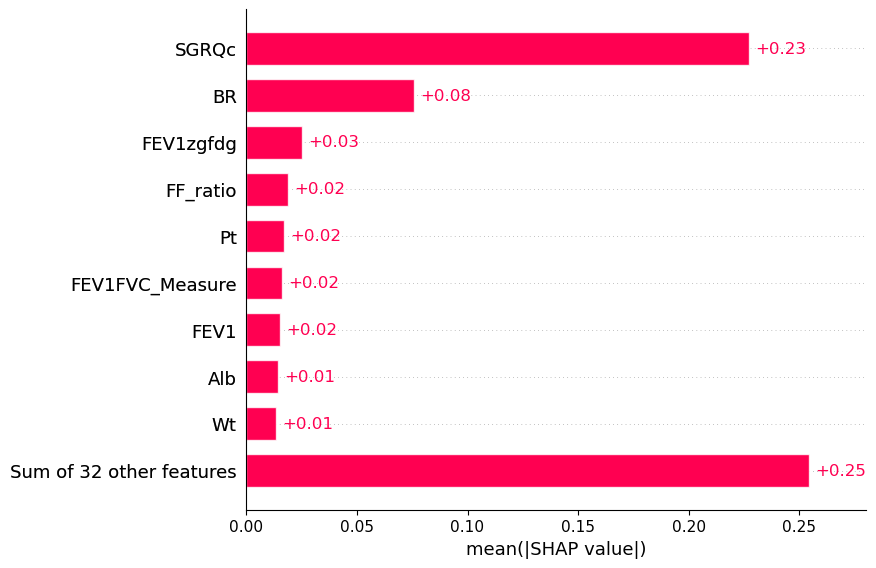

In [101]:
import shap
# Fits the explainer
explainer = shap.Explainer(clf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test[1:10])
shap.plots.bar(shap_values)

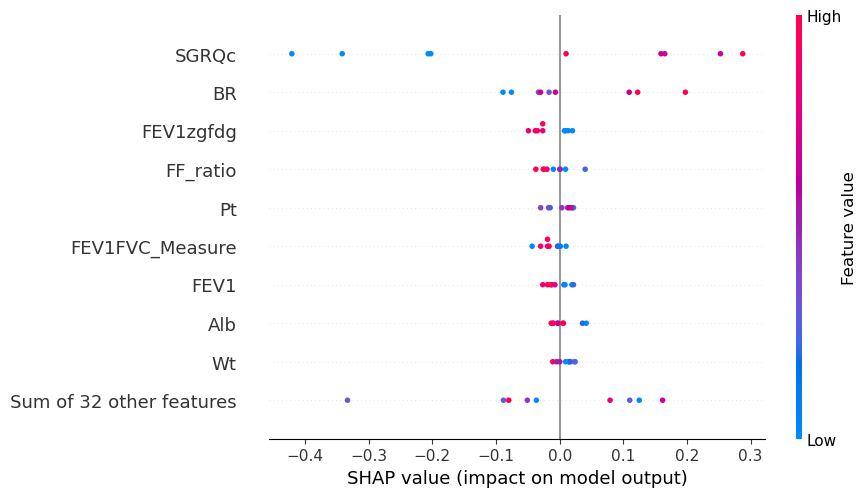

In [103]:
shap.plots.beeswarm(shap_values)

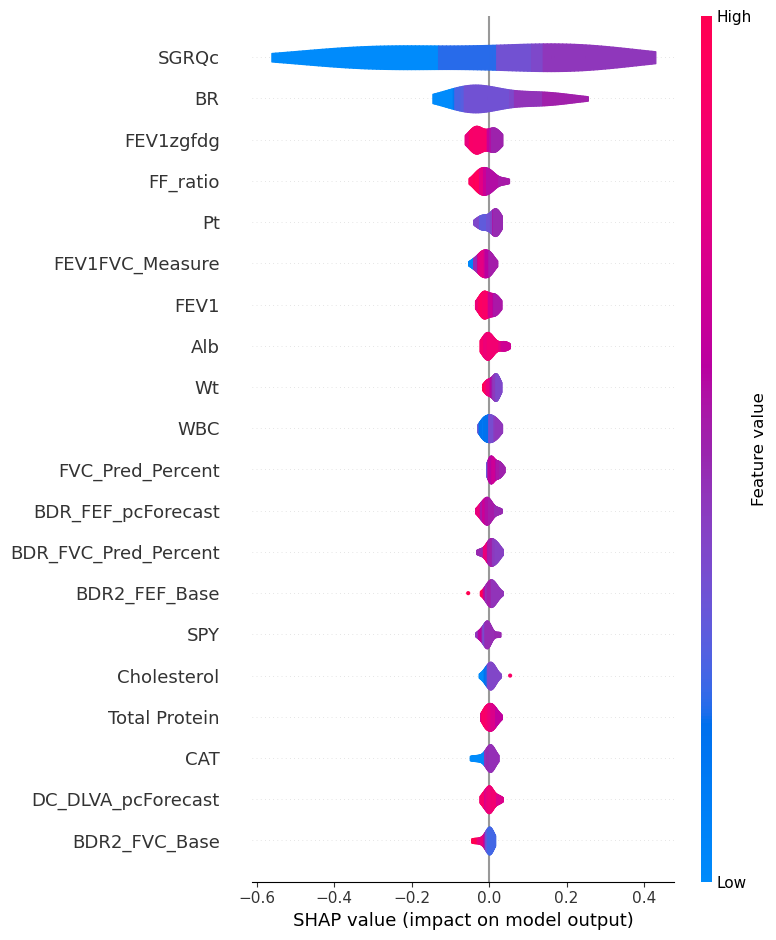

In [105]:
shap.summary_plot(shap_values, plot_type='violin')

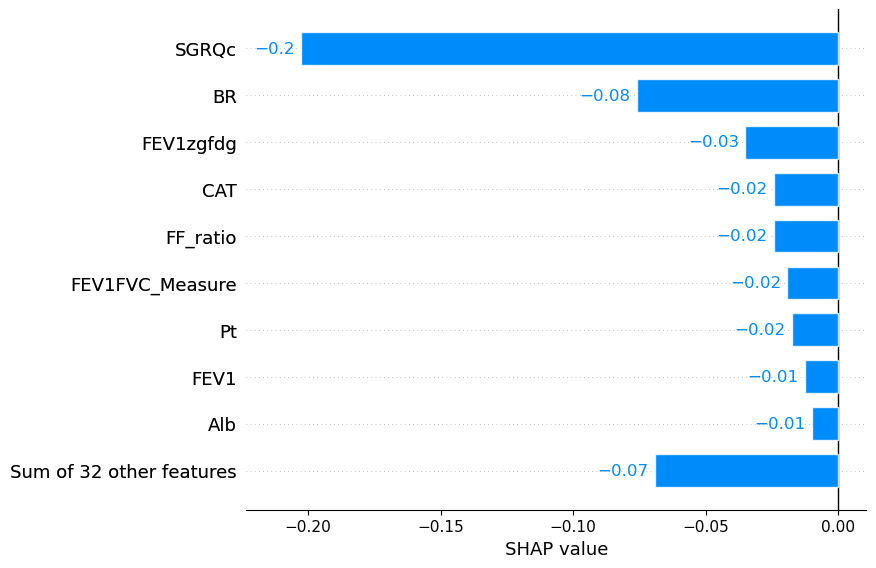

In [106]:
shap.plots.bar(shap_values[0])

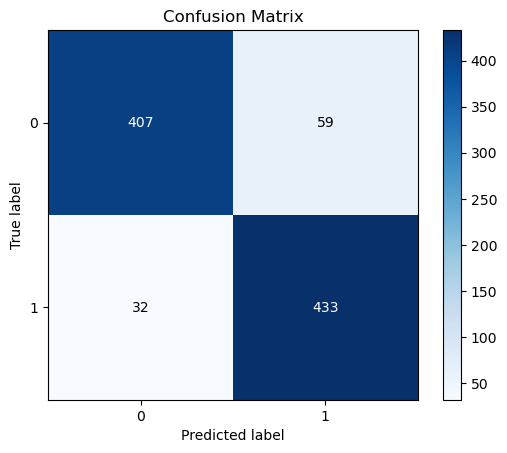

In [92]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_true, y_pred)
plt.show()

In [84]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
phat = clf.predict_proba(X_test)[:,1]

In [85]:
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

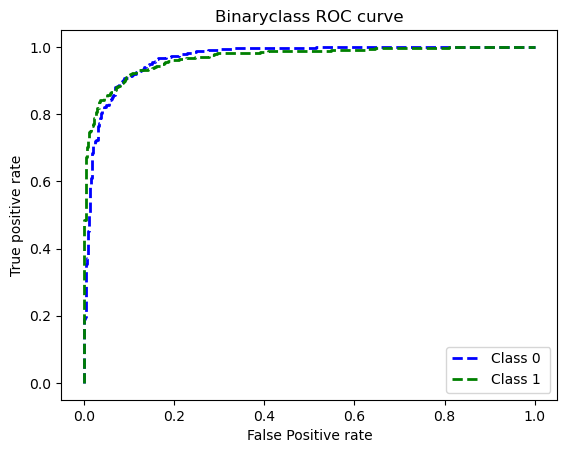

In [86]:
fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
plt.plot(fpr[0],tpr[0], linestyle='--',color='blue',marker='',lw=2, label='Class 0 ')
plt.plot(fpr[1],tpr[1], linestyle='--',color='green',marker='',lw=2, label='Class 1 ')

plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.savefig('BinaryClass ROC',dpi=400)

In [95]:
# !pip install ptitprince

In [94]:
# # plotting the clouds
# import seaborn as sns
# import matplotlib.pyplot as plt
# import ptitprince as pt
# f, ax = plt.subplots(figsize=(7, 5))
# dy="clf"; dx="accuracy_score"; ort="h"; pal = sns.color_palette(n_colors=1)
# ax=pt.half_violinplot( x = dx, y = dy, data = data, palette = pal, bw = .2, cut = 0.,
#                       scale = "area", width = .6, inner = None, orient = ort)
# plt.title("Figure P2\n Basic Rainclouds")
# if savefigs:
#     plt.savefig('../figs/tutorial_python/figureP02.png', bbox_inches='tight')

In [93]:
# import shap
# # %% Create SHAP explainer
# explainer = shap.TreeExplainer(model1)
# # Calculate shapley values for test data
# start_index = 1
# end_index = 2
# shap_values = explainer.shap_values(X_test[start_index:end_index])
# X_test[start_index:end_index]

# # %% Investigating the values (classification problem)
# # class 0 = contribution to class 1
# # class 1 = contribution to class 2
# print(shap_values[0].shape)
# shap_values

# # %% >> Visualize local predictions
# shap.initjs()
# # Force plot
# prediction = model1.predict(X_test[start_index:end_index])[0]
# print(f"The RF predicted: {prediction}")
# shap.force_plot(explainer.expected_value[1],
#                 shap_values[1],
#                 X_test[start_index:end_index]) # for values

# # %% >> Visualize global features
# # Feature summary
# # shap.summary_plot(shap_values, X_test)
# shap.plots.beeswarm(shap_values, max_display=12, show=False, color_bar=False, order=order)

# 92%

In [77]:
# # Below, random_state is only used to guarantee repeatable result for the tutorial. 
# rfClf = RandomForestClassifier(n_estimators=100, random_state=0) # 100 trees. 
# # svmClf = SVC(kernel='rbf', gamma=7.9, C=20, decision_function_shape='ovo',probability=True, random_state=0) # force a probability calculation
# gbcClf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
# xgbClf = XGBClassifier(random_state=0)
# knClf = KNeighborsClassifier(n_neighbors=2)


# clf = VotingClassifier(estimators = [('rf',rfClf), ('gbc', gbcClf), ('xgb', xgbClf), ('kne',knClf)], voting='soft') # construct the ensemble classifier

# try

In [78]:
# # Below, random_state is only used to guarantee repeatable result for the tutorial. 
# rfClf = RandomForestClassifier(n_estimators=100, random_state=0) # 100 trees. 
# svmClf = GradientBoostingClassifier(random_state=101) # force a probability calculation
# gbcClf = XGBClassifier()
# xgbClf = SVC(kernel='rbf', gamma=7.9, C=40, decision_function_shape='ovo',probability=True, random_state=0,degree=1)
# MLP = MLPClassifier(max_iter=500,activation='relu', learning_rate_init=0.000001,shuffle=True,
#                     learning_rate='constant', beta_1=0.9, beta_2=0.999 , momentum=0.999,
#                     power_t=0.9, solver='lbfgs', alpha=1e-5, random_state=101)


# clf = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('gbc', gbcClf), ('xgb', xgbClf), ('kne',knClf)], voting='soft') # construct the ensemble classifier

In [391]:
# prediction = clf.predict(X_test)

In [83]:
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# print(classification_report(y_test, prediction))
# print(accuracy_score(y_test, prediction))
# print(confusion_matrix(y_test, prediction))

In [81]:
# Below, random_state is only used to guarantee repeatable result for the tutorial. 
rfClf = RandomForestClassifier(n_estimators=100, random_state=0) # 100 trees. 
svmClf = SVC(kernel='rbf', gamma=7.9, C=20, decision_function_shape='ovo',probability=True, random_state=0) # force a probability calculation
gbcClf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
xgbClf = XGBClassifier(random_state=0)
knClf = KNeighborsClassifier(n_neighbors=2)


clf = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('gbc', gbcClf), ('xgb', xgbClf), ('kne',knClf)], voting='hard') # construct the ensemble classifier

# MLP

In [149]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

# # Below, random_state is only used to guarantee repeatable result for the tutorial. 
# LR = LogisticRegression(random_state=0)
# rfClf = RandomForestClassifier(n_estimators=100, random_state=0)# 500 trees.
# gbm = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,warm_start=True)
# mlp = MLPClassifier(random_state=0)

# clf = VotingClassifier(estimators = [('LR',LR), ('RF',rfClf),('GBM', gbm),('MLP', mlp)], voting='soft') # construct the ensemble classifier

activation='tanh', alpha=3, solver='lbfgs', hidden_layer_sizes=(300,150,75, 40), learning_rate='adaptive', random_state=1, tol=0.000001

In [150]:
# clf.fit(X_train, y_train) # train the ensemble classifier

VotingClassifier(estimators=[('LR', LogisticRegression(random_state=0)),
                             ('RF', RandomForestClassifier(random_state=0)),
                             ('GBM',
                              GradientBoostingClassifier(learning_rate=0.005,
                                                         max_depth=9,
                                                         max_features=7,
                                                         min_samples_leaf=60,
                                                         min_samples_split=1200,
                                                         n_estimators=1200,
                                                         random_state=10,
                                                         subsample=0.85,
                                                         warm_start=True)),
                             ('MLP', MLPClassifier(random_state=0))],
                 voting='soft')

In [87]:
from sklearn.metrics import precision_score, accuracy_score
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the test set: ', precision_score(y_true, y_pred))
print('accuracy on the test set: ', accuracy_score(y_true, y_pred))

precision on the test set:  0.8800813008130082
accuracy on the test set:  0.9022556390977443


In [88]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       466
           1       0.88      0.93      0.90       465

    accuracy                           0.90       931
   macro avg       0.90      0.90      0.90       931
weighted avg       0.90      0.90      0.90       931

0.9022556390977443
[[407  59]
 [ 32 433]]


In [91]:
# !pip install scikit-plot

In [76]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)
# exp = interpretor.explain_instance(
#     data_row=X_test.iloc[222], ##new data
#     predict_fn=clf.predict_proba
# )
# exp.show_in_notebook(show_table=True)


In [ ]:
from sklearn.ensemble import VotingClassifier

eclf_MVE = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gbm', clf3), ('ann', clf4)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf_MVE], ['Logistic Regression', 'Random Forest', 'Gradient Boosting Machine', 'Artificial Neural Networ', 'Ensemble']):scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("MVE_Accuracy: %0.6f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       466
           1       0.94      0.85      0.89       465

    accuracy                           0.90       931
   macro avg       0.90      0.90      0.90       931
weighted avg       0.90      0.90      0.90       931

0.8979591836734694
[[441  25]
 [ 70 395]]


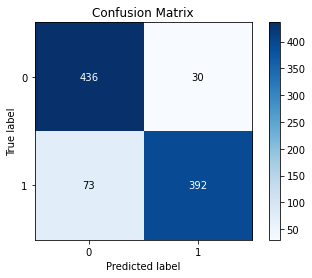

In [17]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()

# SVM

In [29]:
from sklearn.svm import SVC
from sklearn import svm
#model = svm.LinearSVC(multi_class="ovr")
model = svm.SVC(kernel='rbf', gamma=7.9, C=20, decision_function_shape='ovo')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       466
           1       0.88      0.89      0.88       465

    accuracy                           0.88       931
   macro avg       0.88      0.88      0.88       931
weighted avg       0.88      0.88      0.88       931

0.882921589688507
[[409  57]
 [ 52 413]]


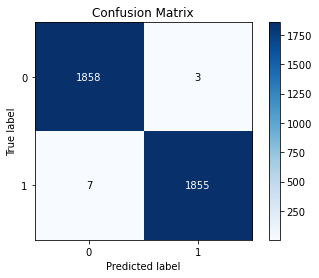

In [40]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_train, prediction)
plt.show()

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       117
           1       0.68      0.76      0.72       116

    accuracy                           0.70       233
   macro avg       0.71      0.70      0.70       233
weighted avg       0.71      0.70      0.70       233

0.703862660944206
[[76 41]
 [28 88]]


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.85      0.87      0.86       116

    accuracy                           0.86       233
   macro avg       0.86      0.86      0.86       233
weighted avg       0.86      0.86      0.86       233

0.8583690987124464
[[ 99  18]
 [ 15 101]]


# GradientBoostingClassifier

In [31]:
model = GradientBoostingClassifier(random_state=101)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       117
           1       0.92      0.84      0.88       116

    accuracy                           0.88       233
   macro avg       0.89      0.88      0.88       233
weighted avg       0.89      0.88      0.88       233

0.8841201716738197
[[109   8]
 [ 19  97]]


# KNeighbors 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       117
           1       0.84      0.91      0.87       116

    accuracy                           0.87       233
   macro avg       0.87      0.87      0.87       233
weighted avg       0.87      0.87      0.87       233

0.8669527896995708
[[ 97  20]
 [ 11 105]]


# XGBClassifier

In [35]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       117
           1       0.92      0.84      0.88       116

    accuracy                           0.89       233
   macro avg       0.89      0.89      0.89       233
weighted avg       0.89      0.89      0.89       233

0.8884120171673819
[[109   8]
 [ 18  98]]


# LinearDiscriminantAnalysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       117
           1       0.70      0.72      0.71       116

    accuracy                           0.70       233
   macro avg       0.70      0.70      0.70       233
weighted avg       0.70      0.70      0.70       233

0.703862660944206
[[81 36]
 [33 83]]
